# Exploratory Anaylysis of Google Play Store Applications

## Contents
1. [Introduction](#1)
2. [Data Overview](#2)
3. [Data Cleaning](#3)
4. [Exploratory Data Analysis](#4)
5. [Predictive Modelling](#5)
6. [Conclusion](#6)
7. [References](#7)

<h2 id="1"> 1. Introduction </h2> 

### 1.1 Background
There are quite a number of numerous applications on mobile phone store apps such as apple store, amazon store, google play store etc. These applications have a wide range of characteristics viz classification of apps and games, some paid and most free, all in different categories (Family, Education, Communication etc.) etc.
As a mobile application developer, I am motivated to explore know how these characteristics/the features of applications listed relates together for a successful deployment of an application in the Android market.

### 1.2 Aims
With the diverse nature of these applications, the reserach <b>aims</b> at exploring
 the dataset inorder to:

1. Determine the app category of the most & least popular and most & least rated applications
2. Determine the correlation between rating and review of applications
3. How the size of an application affects other features of the application
4. How demographics such as content rating, age impact other features of the application
5. Analyse Characteristics of rated applications
6. Predict what the rating of an application based on other features
7. Predict the number of downloads based on other features of the application

### 1.3 Objectives
At the end of this exploratory analysis, the objective is to:

1. Perform statistical analysis and data exploration.
2. Be able to draw useful facts and inisight from the data.
3. Provide insights that will help developers to understand what type and category of apps are likely to attract more users on Google Play.


### 1.4 Data Source & Pipeline
The data set used for this analysis is taken from kaggle which can be found <a href="https://www.kaggle.com/lava18/google-play-store-apps">here</a>. It was initially scraped from the Google Play Store according to the author:

<blockquote cite="https://www.kaggle.com/lava18/google-play-store-apps">
While there are a large number of public datasets that provide data from the Apple App Store (such as those found on Kaggle and other similar websites), there are not nearly as many public datasets that provide data from the Google Play Store. After doing some additional research, It was discovered that the page for the iTunes App Store used a beautifully indexed appendix-like structure, which makes it possible for simple and easy web scraping. (Lavanya Gupta, 2018)
</blockquote> 


This dataset (in csv) was choosen because it contains the basic properties,characteristics and details needed to describe an application. It has 10841 rows and 13 columns.
The rows are the applications and the column are the feature of the application for analysis with the following 13 features: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver.

Nevertheless, this dataset does not include recently released applications, plans were made to update the data set to the recent playstore data through web scraping.
The data was scraped on August 2018. The dataset was licensed to be used open and free under the Creative Commons CC0 1.0 Universal (CC0 1.0) Public Domain Dedication.

Facts and findings from this analysis is credited to Lavanya Gupta and Google Play Store because the app information would not have been available without these two entities.
All outcome are only meant for understanding the android application market and not for any other purpose
and the accuracy of any findings can't exceed the accuracy of the data used for the analysis.

The dataset is loaded into the notebook from the base directory of the project and resulting dataset after cleaning is saved in the same base directory of the project. The data is distributed amidst the available application category.
It was firstly cleaned by replacing/removing the duplicates, inconsistent and null values. Then it was analysed using the pandas library and then visualized using the matplotlib and seaborn libraries in python.
I have choosen to use the dataset consisting only aggregate reviews of applications and not the detailed review provided from the data source, because no sentiment analysis is intended to be carried out in this analysis.
At the end of the analysis, the conclusions were made based on the aims and objectives of this research which are deduced from the analysis and visualizations.


Impoting Libraries

In [454]:
# import libraries
import seaborn as sns
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore') # to ignore warnings in the notebook that are not important


<h2 id="2"> Data Overview </h2>

In [455]:
data = pd.read_csv('googleplaystore.csv')  # read the data
data.sample(10)  # this will show 10 random rows from the data


App            Category  \
9690                        Out There Chronicles - Ep. 1              FAMILY   
8589   e-DN - den digitala tidningen från Dagens Nyheter  NEWS_AND_MAGAZINES   
10192                                          Facejjang         PHOTOGRAPHY   
2516                                          RT 516 VET             MEDICAL   
5443                                   3D Holograms Joke              FAMILY   
284     SignEasy | Sign and Fill PDF and other Documents            BUSINESS   
1926                                        Swamp Attack                GAME   
8677                                           DP Editor         PHOTOGRAPHY   
3073                             NCAA March Madness Live              SPORTS   
486                        Hinge: Dating & Relationships              DATING   

       Rating  Reviews                Size     Installs  Type  Price  \
9690      4.4     1516                 44M      50,000+  Paid  $2.99   
8589      2.2      160                 32M      50,000+  Free      0   
10192     4.1   100179                 96M  10,000,000+  Free      0   
2516      NaN        0                 29M          10+  Free      0   
5443      2.9    31596                 31M   5,000,000+  Free      0   
284       4.3     8978  Varies with device   1,000,000+  Free      0   
1926      4.4  2119218                 70M  50,000,000+  Free      0   
8677      4.3       18                 15M       5,000+  Free      0   
3073      4.1    34123                 19M   5,000,000+  Free      0   
486       4.2     7779                 12M     500,000+  Free      0   

      Content Rating            Genres       Last Updated         Current Ver  \
9690        Everyone      Role Playing  November 27, 2017               1.0.4   
8589    Everyone 10+  News & Magazines       May 24, 2018               1.3.2   
10192       Everyone       Photography       May 17, 2018                2.52   
2516        Everyone           Medical      July 13, 2018         300000.1.11   
5443            Teen        Simulation  December 23, 2016                 1.5   
284         Everyone          Business      July 25, 2018  Varies with device   
1926    Everyone 10+            Action      June 29, 2018               3.0.1   
8677            Teen       Photography     August 4, 2018                 1.5   
3073        Everyone            Sports     March 30, 2018               7.1.0   
486       Mature 17+            Dating     August 3, 2018               6.1.3   

              Android Ver  
9690           4.2 and up  
8589           4.4 and up  
10192        4.0.3 and up  
2516         4.0.3 and up  
5443           2.3 and up  
284    Varies with device  
1926           4.1 and up  
8677           4.1 and up  
3073           5.0 and up  
486            5.0 and up

In [456]:
data.shape  # to see the shape of the data i.e. no. of rows and columns


(10841, 13)

In [457]:
data.info()  # see the information of the data and the data types of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [458]:
# see the description of the data, the include='O' is used to see the description of the object type columns
data.describe(include='O')


App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451

In [459]:
data.describe()  # to see the description of other data types not object type (Rating)


Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [460]:
# This list total number of applications in each category
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

### Observations after overview

The datatype of all the features (including price and reviews) are objects except for rating which is float. This is because the price and reviews features contain commas and dollar signs. Removing the commas and dollar signs will be appropriate so as to convert the datatype of the features.
Some features with missing values are rating, reviews, size, current ver and android ver, with ratings being the highest.
There are 10841 rows (Apps) with 13 columns (features)
The name of the apps are expected to be unique but there are $10841 - 9659 = 1182$ 
apps. All App is expected to be unique throughout, but no, it isn't. 9659 out of 10841 are unique. Others have exactly the same name. Is it possible to have two apps with exactly the same name? I don't think so, but it seems play store uses only app id to identify apps and likewise there is a possibility of having duplicate app info recorded in the data.
I also observed many irregular data entries, Some current version have non float data type as integers.
Based on the dataset most category of application falls into the family category, most of the application are installed 1,000,000+ times, most of the application are of free type i.e most of the application are price 0, most of the application are content rating everyone, most of the application are genres family, most of the application are last updated 2018-08-03, most of the application are current ver 1.0 and most of the application are android ver 4.1 and up.

This observation from the data overview has really helped me to understand the data better and also to know what to expect from the data and it has quickly answered some analytic questions. It has also helped me to know what to do next in the data cleaning process.


<h2 id="3"> Data Cleaning </h2>

To easily know data that should be dropped or replaced, visualization will be needed to see the distribution of the data.

The code fragments below are reusable and useful for the purpose of visualization and cleaning of the data.

In [461]:
# this plot will show the distribution of the rating
def plot_dist(data, col):
    fig, ax = plt.subplots(figsize=(8, 6))  # to set the size of the plot
    sns.heatmap(data.isnull(), cbar=False, ax=ax)  # to plot the heatmap
    ax.set_yticks([])  # to remove the yticks
    ax.tick_params(bottom='')  # to remove the bottom ticks


def remove_spines_on_plot(ax, spines):  # to remove the spines on the plot
    for spine in spines:
        ax.spines[spine].set_visible(False)


def fill_with_mode(cols):
    for col in cols:  # loop through the columns
        mode = stat.mode(data[col])  # get the mode of the column
        data[col].fillna(mode)  # fill the null values with the mode
    return data


def fill_with_mean(cols):
    for col in cols:  # loop through the columns
        # get the mean of the column excluding the null values
        mean = data[col].mean(skipna=True)
        # print(mean)
        # fill the null values with the mean
        data[col] = data[col].fillna(mean)
    return data


### Handling Mising values

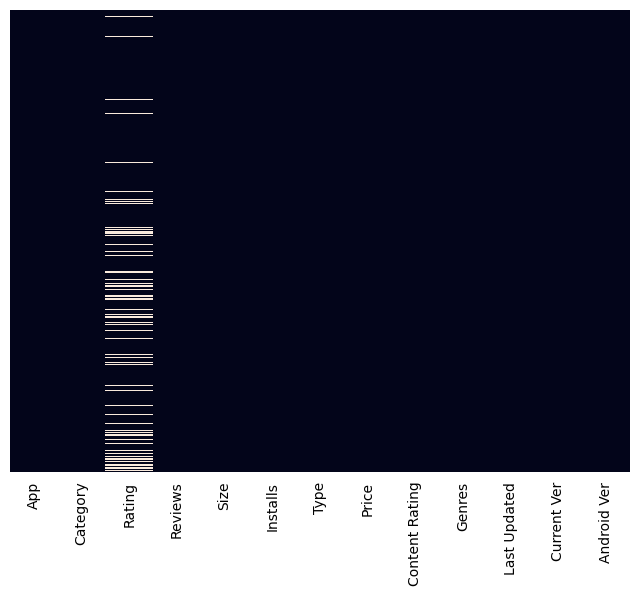

In [462]:
plot_dist(data, 'Rating')

In [463]:
data.isnull().sum()  # to see the null values in the data

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

All object dtypes with missing values will be <b>replaced</b> with the most occuring entry in their column (mode),
because there is high probability that those values are the most occuring values in their column.
Rating, a float dtype will be <b>replaced</b> with the mean of Rating column for the gerne each missing value belong to. The mean is used because it is less sensitive to outliers than other measures of central tendency such as the median.

Replacing this missing values will make the data more coherent and consistent. It will also make the data more reliable and accurate.


In [464]:
# list of the columns with object data type and having missing values
missing_obj_dype_cols = [
    'Type', 'Content Rating', 'Current Ver', 'Android Ver'
]

# call the function to fill the missing values
fill_with_mode(missing_obj_dype_cols)
# check the null values


App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [465]:
# get the round of average rating per genre
avg_per_gerne = round(data.groupby('Genres').mean(), 1)
# get the dictionary of the average rating per genre for filling the missing values
fill_to = avg_per_gerne.to_dict()['Rating']
# this will set the index of the data to the genre so that we can fill the missing values with the average rating per genre
data.Rating.index = data.Genres.values
# fill the missing values with the average rating per genre
data['Rating'] = pd.Series(data['Rating'].fillna(fill_to).values)


In [466]:
data.isnull().sum()

App               0
Category          0
Rating            5
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

What's with these redundant five nans (missing values)?!
Let's have a look .


In [467]:
redundant = data[data.Rating.isnull()] # shows all the rows with null values in the rating column 
redundant

App        Category  \
23                              Mcqueen Coloring pages  ART_AND_DESIGN   
2111                            Mcqueen Coloring pages          FAMILY   
6829                                   Bu Hangi Firma?          FAMILY   
7629                                        Wuwu & Co.          FAMILY   
9672  Masha and the Bear - Hair Salon and MakeUp Games          FAMILY   

      Rating Reviews  Size  Installs  Type  Price Content Rating  \
23       NaN      61  7.0M  100,000+  Free      0       Everyone   
2111     NaN      65  7.0M  100,000+  Free      0       Everyone   
6829     NaN       8   26M      100+  Free      0       Everyone   
7629     NaN       9   77M      100+  Paid  $2.99       Everyone   
9672     NaN       1   83M      100+  Paid  $2.49       Everyone   

                               Genres       Last Updated Current Ver  \
23    Art & Design;Action & Adventure      March 7, 2018       1.0.0   
2111  Art & Design;Action & Adventure      March 7, 2018       1.0.0   
6829                 Trivia;Education  December 10, 2017      3.3.6z   
7629     Books & Reference;Creativity     March 22, 2017        2.49   
9672           Role Playing;Education      March 5, 2018       1.0.1   

       Android Ver  
23      4.1 and up  
2111    4.1 and up  
6829  4.0.3 and up  
7629    4.1 and up  
9672    4.1 and up

Their genres belong to either 'Art & Design;Action & Adventure', 'Trivia;Education', 'Books & Reference;Creativity' or 'Role
Playing;Education'.
> Let's check for the values these keys belong to in the 'fill_to' dictionary.


In [468]:
fill_to.values() # show the values of the dictionary


dict_values([4.3, 4.3, 4.2, 4.4, 4.6, 4.1, 4.3, 4.3, 4.5, 4.4, nan, 4.4, 3.9, 4.2, 4.3, 4.3, 4.0, 4.3, 4.8, 4.3, nan, 4.2, 4.1, 4.1, 4.3, 4.4, 4.3, 4.2, 4.3, 4.5, 4.3, 4.3, 4.1, 4.2, 4.1, 4.8, 4.2, 4.2, 4.0, 4.3, 4.3, 4.4, 4.3, 4.4, 4.2, 4.4, 3.9, 4.2, 4.2, 4.0, 4.2, 4.2, 4.1, 4.2, 4.3, 4.5, 4.4, 4.2, 4.0, 4.4, 19.0, 4.1, 4.2, 4.3, 3.9, 4.7, 4.2, 4.2, 4.1, 4.3, 4.0, 4.1, 4.2, 4.2, 4.3, 4.5, 4.1, 4.3, 3.8, 3.9, 4.3, 4.3, 4.2, 4.2, 4.4, 4.3, 4.4, 4.4, 4.6, 4.2, 4.3, 4.5, 4.3, 4.3, 4.3, nan, 4.0, 4.3, 4.2, 4.4, 4.4, 4.4, 4.3, 4.2, 4.4, 4.2, 4.6, 4.4, 4.5, 4.0, 4.5, 4.1, 4.1, 4.0, nan, 4.1, 4.1, 4.0, 4.2, 4.4])

In [469]:
fill_to['Trivia;Education'] # get the value of the key 'Trivia;Education'

nan

The average value of these Genres was nan all along. <br>
These missing values were replaced with a missing value! Hence, the missing value turned redundant. <br>
There's nothing left to do than to drop these, or fill them with the overall mean.


In [470]:
# fill the missing values with the mean of the rating column
fill_with_mean(['Rating'])
# data['Rating'] = data['Rating'].fillna(data['Rating'].mean())


App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     4.2       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

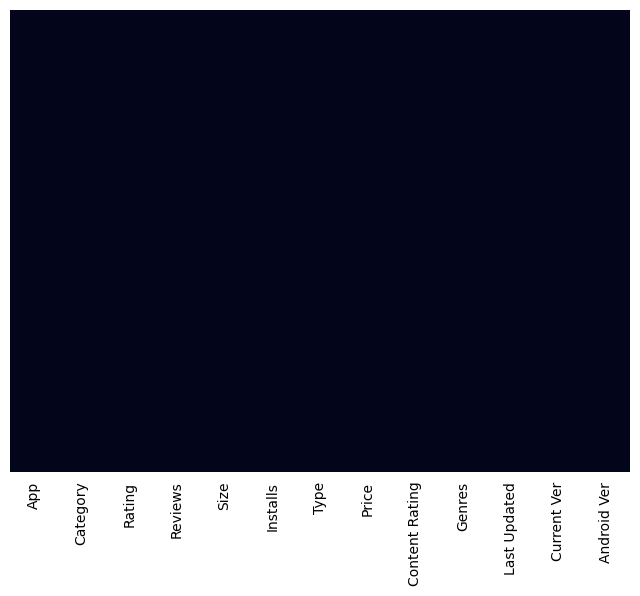

In [471]:
plot_dist(data,'Rating') # plot the heatmap to see the missing values

In [472]:
data.isnull().sum() # check the null values, we can see that there are no null values in the rating column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

<pre>I noticed that some of the rating are out of bound. Google play rating is usually on a scale of 1 to 5.
See below.
</pre>


In [473]:
# get maximum value of the rating column
data['Rating'].max()


19.0

In [474]:
# get minimum value of the rating column
data['Rating'].min()

1.0

The maximum looks odd. Let's have a look at the distribution of the ratings.

<AxesSubplot:xlabel='Rating'>

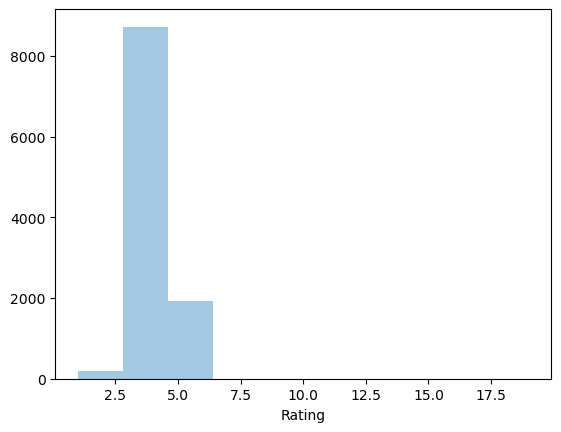

In [475]:
# Distribution of the rating column
sns.distplot(data['Rating'], bins=10, kde=False)


With the distribution of the ratings, it is clear that the maximum rating is 5.0. The maximum rating of 19.0 is an outlier. It will be replaced with the mean of the ratings for the genre it belongs to.

In [476]:
# Replace the values of the rating column with the mean of the rating column
data['Rating'] = data['Rating'].replace(19.0, data['Rating'].mean())
data['Rating'].max()  # check the maximum value of the rating column

5.0

### Cleaning Inconsistent Data Entries.
The dtypes of come columns would also be changed here.


In [477]:
data.sample(10)  # view 10 random rows from the data


App     Category  Rating  \
8745                                       World Webcams      WEATHER     3.7   
2909   Candy Camera - selfie, beauty camera, photo ed...  PHOTOGRAPHY     4.4   
10239  FC Barcelona Fantasy Manager: Real football mo...       SPORTS     4.4   
2687             Club Factory Everything, Unbeaten Price     SHOPPING     4.2   
5064    Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka    LIFESTYLE     5.0   
5189                                 Youper - AI Therapy      MEDICAL     4.6   
2676   Home & Shopping - Only in apps. 10% off + 10% off     SHOPPING     4.2   
10093                         EY Digi India Personal Tax     BUSINESS     4.0   
7434                                       Pekalongan CJ       SOCIAL     4.3   
1645                         Relax Ocean ~ Nature Sounds    LIFESTYLE     4.5   

       Reviews                Size      Installs  Type Price Content Rating  \
8745      7896  Varies with device    1,000,000+  Free     0       Everyone   
2909   3368646  Varies with device  100,000,000+  Free     0       Everyone   
10239    15221                 30M    1,000,000+  Free     0       Everyone   
2687    244141                7.3M   10,000,000+  Free     0       Everyone   
5064         7                3.4M        1,000+  Free     0       Everyone   
5189      1976                 69M       50,000+  Free     0       Everyone   
2676     42750                9.9M   10,000,000+  Free     0       Everyone   
10093        2                1.7M          100+  Free     0       Everyone   
7434         0                5.9M            0+  Free     0           Teen   
1645      9464  Varies with device      500,000+  Free     0       Everyone   

            Genres       Last Updated         Current Ver         Android Ver  
8745       Weather  November 25, 2013                 1.6  Varies with device  
2909   Photography      July 16, 2018                4.47        4.0.3 and up  
10239       Sports    October 2, 2017            7.30.005        4.0.3 and up  
2687      Shopping     August 6, 2018               4.4.5          4.3 and up  
5064     Lifestyle       June 9, 2018                 1.4          4.0 and up  
5189       Medical     August 3, 2018            6.02.000          6.0 and up  
2676      Shopping     August 4, 2018               2.8.7          4.1 and up  
10093     Business       May 24, 2018                 5.0        4.0.3 and up  
7434        Social      July 21, 2018               0.0.1          4.4 and up  
1645     Lifestyle      July 18, 2017  Varies with device  Varies with device

#### Reviewing each column for any irregularities
App : Seems normal. Anyone could name their app anything.
Category : I'd love to remove these 'harmless' underscores. Besides, there could be meaningless or repeated categories. We'd check
for this too.
Rating : Perfectly filled!
Reviews : Hmmm, I'm unsure it's perfect. We'd try converting them to integers to be sure. Having a ValueError means the column needs cleaning.
Size : Nicely filled. I should still check to be sure.
Installs : Normal. I should still check to be sure.
Type : Normal too. I should still check to be sure.
Price : I will remove the dollar sign, change its dtype to float and rename it.
Content Rating : I found something strange here. See below:


In [478]:
data.iloc[141:142] # view the row with index 141

App             Category  Rating Reviews  \
141  Download free book with green book  BOOKS_AND_REFERENCE     4.6    4478   

     Size  Installs  Type Price Content Rating             Genres  \
141  9.5M  100,000+  Free     0   Everyone 10+  Books & Reference   

      Last Updated Current Ver Android Ver  
141  July 31, 2017         1.1  4.0 and up

'Everyone 10+' <br>
Downloading the game is restricted to those 10 or above. Why then, should Everyone be included? For all occurences similar to this, we'd remove Everyone from there. We'd also check other values to be sure. <br>
Genre : Seems normal. I will still check to be sure. <br>
Last Updated : This would be converted to datetime. <br>
Current Ver : Looks nice. We'd still check to be sure. <br>
Android Ver : Very perfect, but we'd still check to be sure. <br>


In [479]:
data['Category']= data['Category'].str.replace('_','  ') # replace the _ with space

In [480]:
data['Category'].unique() # get the unique values of the category column

array(['ART  AND  DESIGN', 'AUTO  AND  VEHICLES', 'BEAUTY',
       'BOOKS  AND  REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD  AND  DRINK', 'HEALTH  AND  FITNESS', 'HOUSE  AND  HOME',
       'LIBRARIES  AND  DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS',
       'TRAVEL  AND  LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY',
       'PARENTING', 'WEATHER', 'VIDEO  PLAYERS', 'NEWS  AND  MAGAZINES',
       'MAPS  AND  NAVIGATION', '1.9'], dtype=object)

The last element in the output above seems off. <br>
Let's peep at the whole data of rows with their category being '1.9'.

In [481]:
data[data['Category']=='1.9'] # get the row with category 1.9

App Category    Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  4.190808    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

I observed that: <br>
__1. Its category is numerical.__ <br>
__2. Its rating is above 5.__ <br>
__3. Last Updated is a datetype, but its has a perplexing entry itself.__ <br>
__4. Its gerne is 'February 11, 2018' - an odd value.__ <br>
__5. Its type is odd as well.__ <br>
__6. While most of the entries in Reviews are integers, this one chose to be 3.0M.__



As a result of the irregularities, the row will be dropped. <br>

In [482]:
data = data.drop(10472) # drop the row with index 10472

In [483]:
#Reviews

data['Reviews'] = data['Reviews'].astype('int') # convert the reviews column to int type

In [484]:
#Size

data['Size'].unique() # get the unique values of the size column

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As expected, everything seems alright.


In [485]:
#Installs

data['Installs'].unique()   # get the unique values of the installs column

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

As expected, everything seems alright.

In [486]:
# Type
data['Type'].unique()  # get the unique values of the type column


array(['Free', 'Paid', nan], dtype=object)

Nice.

In [487]:
# Price
# this will remove the $ sign from the price column
data['Price'] = data['Price'].str.replace('$', '')
# this will convert the price column to float type
data['Price'] = data['Price'].astype('float')


Nice

In [488]:
# get the unique values of the content rating column
data['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Everyones 10+ are absurd for content rating.

In [489]:
# Content Rating
# this will get the rows with the absurd content rating i.e. Everyone with a space
absurd = data[data['Content Rating'].str.contains('Everyone ')]
absurd


App               Category  Rating  \
22     Superheroes Wallpapers | 4K Backgrounds       ART  AND  DESIGN     4.7   
77        Police Detector (Speed Camera Radar)    AUTO  AND  VEHICLES     4.3   
113                  Wrinkles and rejuvenation                 BEAUTY     4.3   
130         Recipes and tips for losing weight                 BEAUTY     4.3   
141         Download free book with green book  BOOKS  AND  REFERENCE     4.6   
...                                        ...                    ...     ...   
10419              Fast Motorcycle Driver 2016                   GAME     4.2   
10639                            Florida Today   NEWS  AND  MAGAZINES     3.3   
10779                    Fortune Quest: Savior                 FAMILY     3.6   
10784                               Big Hunter                   GAME     4.3   
10789       Modern Counter Global Strike 3D V2                   GAME     4.0   

       Reviews  Size     Installs  Type  Price Content Rating  \
22        7699  4.2M     500,000+  Free    0.0   Everyone 10+   
77        3574  3.9M   1,000,000+  Free    0.0   Everyone 10+   
113        182  5.7M     100,000+  Free    0.0   Everyone 10+   
130         35  3.1M      10,000+  Free    0.0   Everyone 10+   
141       4478  9.5M     100,000+  Free    0.0   Everyone 10+   
...        ...   ...          ...   ...    ...            ...   
10419    28151   49M   1,000,000+  Free    0.0   Everyone 10+   
10639      202   38M      10,000+  Free    0.0   Everyone 10+   
10779      135   75M      10,000+  Free    0.0   Everyone 10+   
10784   245455   84M  10,000,000+  Free    0.0   Everyone 10+   
10789      368   48M      50,000+  Free    0.0   Everyone 10+   

                  Genres        Last Updated Current Ver   Android Ver  
22          Art & Design       July 12, 2018     2.2.6.2  4.0.3 and up  
77       Auto & Vehicles        July 4, 2018         1.6    4.0 and up  
113               Beauty  September 20, 2017         8.0    3.0 and up  
130               Beauty   December 11, 2017         2.0    3.0 and up  
141    Books & Reference       July 31, 2017         1.1    4.0 and up  
...                  ...                 ...         ...           ...  
10419             Racing   December 25, 2016         1.2  2.3.3 and up  
10639   News & Magazines       June 20, 2018       5.9.5    5.0 and up  
10779       Role Playing        June 1, 2018       1.022    4.4 and up  
10784             Action        May 31, 2018       2.8.6    4.0 and up  
10789             Action      March 28, 2018         1.7    4.1 and up  

[414 rows x 13 columns]

In [490]:
absurd['Content Rating'].unique() # get the unique values of the absurd content rating

array(['Everyone 10+'], dtype=object)

With this observation <br>
More than 400 rows are 'absurd'

In [491]:
data['Content Rating'] = data['Content Rating'].str.replace(
    'Everyone 10', '10')  # replace the absurd content rating with 10

# get the value counts of the content rating column
data['Content Rating'].value_counts()


Everyone           8714
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

'Unrated' should also fall under 'Everyone'. <br>


In [492]:
data['Content Rating'] = data['Content Rating'].str.replace(
    'Unrated', 'Everyone')  # replace the absurd content rating with Everyone

# get the value counts of the content rating column
data['Content Rating'].value_counts()


Everyone           8716
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [493]:
# Genres
data['Genres'].unique() # get the unique values of the genres column

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

It Seems so dirty. <br>


In [494]:
data['Content Rating'] = data['Content Rating'].str.replace(
    'Unrated', 'Everyone')  # this will replace the unrated with everyone
# get the value counts of the content rating column
data['Content Rating'].value_counts()


Everyone           8716
Teen               1208
Mature 17+          499
10+                 414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [495]:
data['Genres'].value_counts()[:20] # this will show the top 20 genres

Tools                842
Entertainment        623
Education            549
Medical              463
Business             460
Productivity         424
Sports               398
Personalization      392
Communication        387
Lifestyle            381
Finance              366
Action               365
Health & Fitness     341
Photography          335
Social               295
News & Magazines     283
Shopping             260
Travel & Local       257
Dating               234
Books & Reference    231
Name: Genres, dtype: int64

Of 117 unique values, the first 20 seem ideal

In [496]:
data['Genres'].value_counts()[20:40]  # this will show the next 20 genres


Arcade                     220
Simulation                 200
Casual                     193
Video Players & Editors    173
Puzzle                     140
Maps & Navigation          137
Food & Drink               127
Role Playing               109
Strategy                   107
Racing                      98
House & Home                88
Libraries & Demo            85
Auto & Vehicles             85
Weather                     82
Adventure                   75
Events                      64
Comics                      59
Art & Design                58
Beauty                      53
Education;Education         50
Name: Genres, dtype: int64

In [497]:
data['Genres'].value_counts()[40:60] # this will show the next 20 genres

Card                           48
Parenting                      46
Board                          44
Educational;Education          41
Casino                         39
Trivia                         38
Educational                    37
Casual;Pretend Play            31
Word                           29
Entertainment;Music & Video    27
Education;Pretend Play         23
Music                          22
Casual;Action & Adventure      21
Racing;Action & Adventure      20
Puzzle;Brain Games             19
Educational;Pretend Play       19
Action;Action & Adventure      17
Arcade;Action & Adventure      16
Board;Brain Games              15
Casual;Brain Games             13
Name: Genres, dtype: int64

Up till music, everything seems perfect. 'Puzzle;Brain Games' should not be a separate gerne, but should be merged with 'Puzzle'. The same goes for the rest, downwards.

In [498]:
data['Genres'].value_counts()[60:] # this will show the rest of the genres

Adventure;Action & Adventure             13
Simulation;Action & Adventure            11
Entertainment;Brain Games                 8
Art & Design;Creativity                   7
Education;Creativity                      7
Casual;Creativity                         7
Role Playing;Action & Adventure           7
Parenting;Education                       7
Educational;Brain Games                   6
Education;Action & Adventure              6
Parenting;Music & Video                   6
Education;Brain Games                     5
Educational;Creativity                    5
Puzzle;Action & Adventure                 5
Role Playing;Pretend Play                 5
Education;Music & Video                   5
Educational;Action & Adventure            4
Simulation;Pretend Play                   4
Sports;Action & Adventure                 4
Entertainment;Creativity                  3
Video Players & Editors;Music & Video     3
Simulation;Education                      3
Music;Music & Video             

In [499]:
# this will remove the sub genres using regular expression
# will only replace those that match the form ;subgenre
data['Genres'] = data['Genres'].str.replace(r';[a-z &]*', '', flags=re.I)


In [500]:
data['Genres'].value_counts() # shoe the value counts of the genres column

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

Educational should be merged with Education  <br>
Music & Audio should be merged with Music.


In [501]:
data['Genres'] = data['Genres'].str.replace('Educational', 'Education').str.replace(
    'Music & Audio', 'Music')  # replace the genres with the same meaning

data['Genres'].unique() # get the unique values of the genres column


array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

This is nice and clean. <br>

In [502]:
# Last Updated

# this will convert the last updated column to datetime type
data['Last Updated'] = pd.to_datetime(data['Last Updated'])


There is an inconsistent data entry here. I will deal with that after this.


In [503]:
# Current Ver

# this will show the unique values of the android version column
data['Android Ver'].unique()


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [504]:
# this will remove the W from the android version column
data['Android Ver'] = data['Android Ver'].str.replace('W', '')


In [505]:
# get the unique values of the android version column
data['Android Ver'].unique()


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

__Review Aftermath__

Removing outliers, if any    <br>
Outliers can only be seen in number.

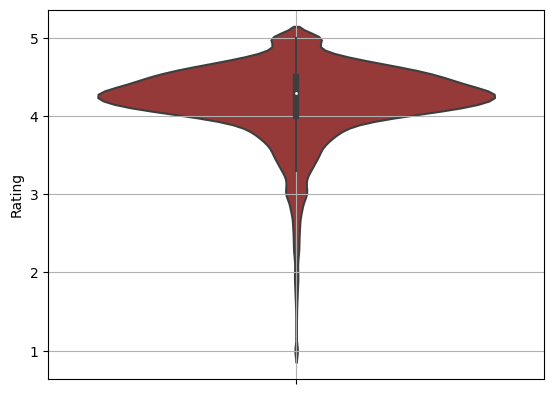

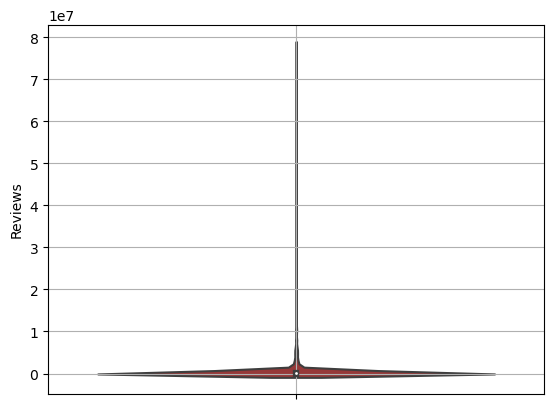

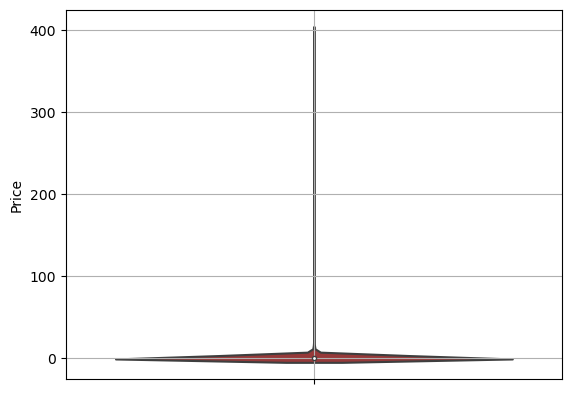

In [506]:
# loop through the int and float columns
for i in data.select_dtypes(['int', 'float']):
    sns.violinplot(y=data[i], color='brown')  # plot the violin plot
    plt.grid()  # show the grid
    plt.show()  # show the plot


They all seems to be without 'outliers' since they are all within resonable ranges.



App is expected to be unique throughout, but it isn't. I deal with that here.

In [507]:
# Before dropping
Apps = data['App'].value_counts()  # get the value counts of the app column
Apps[Apps > 1]  # show the apps that have more than one entry


ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

There are almost 800 apps repeated.  <br>
Let's check a few of them.


In [508]:
data[data['App'] == 'ROBLOX'] # show the rows with the app ROBLOX

App Category  Rating  Reviews Size      Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388  67M  100,000,000+  Free    0.0   
1701  ROBLOX     GAME     4.5  4447346  67M  100,000,000+  Free    0.0   
1748  ROBLOX     GAME     4.5  4448791  67M  100,000,000+  Free    0.0   
1841  ROBLOX     GAME     4.5  4449882  67M  100,000,000+  Free    0.0   
1870  ROBLOX     GAME     4.5  4449910  67M  100,000,000+  Free    0.0   
2016  ROBLOX   FAMILY     4.5  4449910  67M  100,000,000+  Free    0.0   
2088  ROBLOX   FAMILY     4.5  4450855  67M  100,000,000+  Free    0.0   
2206  ROBLOX   FAMILY     4.5  4450890  67M  100,000,000+  Free    0.0   
4527  ROBLOX   FAMILY     4.5  4443407  67M  100,000,000+  Free    0.0   

     Content Rating     Genres Last Updated   Current Ver Android Ver  
1653            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
1701            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
1748            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
1841            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
1870            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
2016            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
2088            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
2206            10+  Adventure   2018-07-31  2.347.225742  4.1 and up  
4527            10+  Adventure   2018-07-31  2.347.225742  4.1 and up

This is definitely a duplicate!

In [509]:
data[data.App == 'ESPN']  # show the rows with the app ESPN


App Category  Rating  Reviews                Size     Installs  Type  \
2959  ESPN   SPORTS     4.2   521138  Varies with device  10,000,000+  Free   
3010  ESPN   SPORTS     4.2   521138  Varies with device  10,000,000+  Free   
3018  ESPN   SPORTS     4.2   521138  Varies with device  10,000,000+  Free   
3048  ESPN   SPORTS     4.2   521140  Varies with device  10,000,000+  Free   
3060  ESPN   SPORTS     4.2   521140  Varies with device  10,000,000+  Free   
3072  ESPN   SPORTS     4.2   521140  Varies with device  10,000,000+  Free   
4069  ESPN   SPORTS     4.2   521081  Varies with device  10,000,000+  Free   

      Price Content Rating  Genres Last Updated         Current Ver  \
2959    0.0            10+  Sports   2018-07-19  Varies with device   
3010    0.0            10+  Sports   2018-07-19  Varies with device   
3018    0.0            10+  Sports   2018-07-19  Varies with device   
3048    0.0            10+  Sports   2018-07-19  Varies with device   
3060    0.0            10+  Sports   2018-07-19  Varies with device   
3072    0.0            10+  Sports   2018-07-19  Varies with device   
4069    0.0            10+  Sports   2018-07-19  Varies with device   

     Android Ver  
2959  5.0 and up  
3010  5.0 and up  
3018  5.0 and up  
3048  5.0 and up  
3060  5.0 and up  
3072  5.0 and up  
4069  5.0 and up

In [510]:
# show the rows with the app Clover Dating App
data[data.App == 'Clover Dating App']


App Category  Rating  Reviews Size  Installs  Type  Price  \
495  Clover Dating App   DATING     4.1    11633  23M  500,000+  Free    0.0   
550  Clover Dating App   DATING     4.1    11633  23M  500,000+  Free    0.0   

    Content Rating  Genres Last Updated Current Ver Android Ver  
495     Mature 17+  Dating   2018-07-24       2.5.1  4.1 and up  
550     Mature 17+  Dating   2018-07-24       2.5.1  4.1 and up

<pre>It would not be too much if an assumption to say that there are many apps were duplicated 
when gathering the data. This will be problematic and it'll make the analysis inaccurate.
I'd, therefore, be dropping duplicates.</pre>


In [511]:
# Before dropping
data.shape # get the shape of the data


(10840, 13)

In [512]:
duplicate = data[data.App.duplicated()]  # get the duplicate rows
duplicate


App       Category  Rating  Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2    80805   
236                                   Box       BUSINESS     4.2   159872   
239                    Google My Business       BUSINESS     4.4    70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4    31614   
261             join.me - Simple Meetings       BUSINESS     4.0     6989   
...                                   ...            ...     ...      ...   
10715                  FarmersOnly Dating         DATING     3.0     1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4    36981   
10730                         FP Notebook        MEDICAL     4.5      410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5    33599   
10768                                AAFP        MEDICAL     3.8       63   

                     Size     Installs  Type  Price Content Rating  \
229    Varies with device   5,000,000+  Free    0.0       Everyone   
236    Varies with device  10,000,000+  Free    0.0       Everyone   
239    Varies with device   5,000,000+  Free    0.0       Everyone   
256                   37M  10,000,000+  Free    0.0       Everyone   
261    Varies with device   1,000,000+  Free    0.0       Everyone   
...                   ...          ...   ...    ...            ...   
10715                1.4M     100,000+  Free    0.0     Mature 17+   
10720                4.0M   1,000,000+  Free    0.0       Everyone   
10730                 60M      50,000+  Free    0.0       Everyone   
10753                 12M   1,000,000+  Free    0.0       Everyone   
10768                 24M      10,000+  Free    0.0       Everyone   

              Genres Last Updated         Current Ver         Android Ver  
229         Business   2018-02-26  Varies with device        4.0.3 and up  
236         Business   2018-07-31  Varies with device  Varies with device  
239         Business   2018-07-24    2.19.0.204537701          4.4 and up  
256         Business   2018-07-20      4.1.28165.0716          4.0 and up  
261         Business   2018-07-16           4.3.0.508          4.4 and up  
...              ...          ...                 ...                 ...  
10715         Dating   2016-02-25                 2.2          4.0 and up  
10720  Communication   2018-07-06                 5.2          5.0 and up  
10730        Medical   2018-03-24           2.1.0.372          4.4 and up  
10753       Shopping   2018-07-30                 3.9          4.4 and up  
10768        Medical   2018-06-22               2.3.1          5.0 and up  

[1181 rows x 13 columns]

In [513]:
data = data.drop(duplicate.index) # drop the duplicate rows

In [514]:
# After dropping
data.shape  # get the shape of the data


(9659, 13)

In [515]:
# After dropping
Apps = data['App'].value_counts()  # get the value counts of the app column
Apps[Apps > 1]  # show the apps that have more than one entry


Series([], Name: App, dtype: int64)

__Data Cleaned.__  <br>
I'd go ahead and save the cleaned version of it.


In [516]:
# save the cleaned data to a csv file
data.to_csv('Cleaned Google Playstore App Dataset.csv')


<h2 id="4"> Exploratory Data Analysis. </h2>


Google Play Store has a whole lot of category. I'm curious to know which category most of the apps there fall to.


Text(0.5, 1.0, 'A Barplot Showing the Number of Apps Made in Each Category.\n\n')

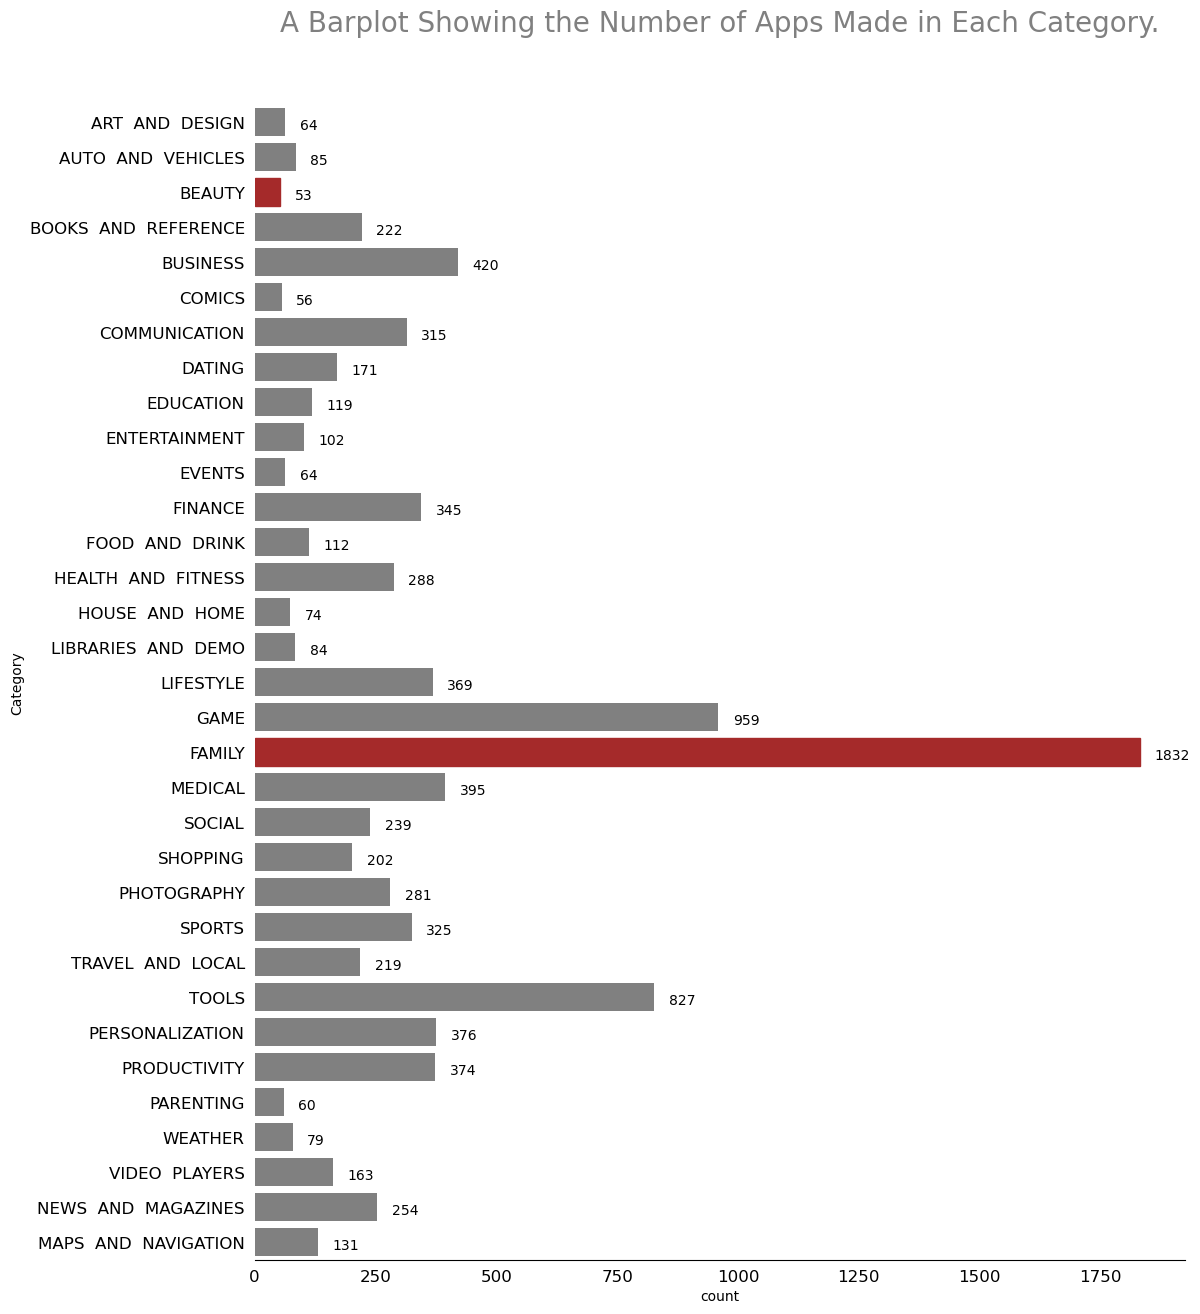

In [517]:
# sets the size of the plot as 12 by 15
fig, ax = plt.subplots(figsize=(12, 15))
plot = sns.countplot(y=data['Category'], ax=ax,
                     color='grey')  # plots the countplot
for i in plot.patches:  # this will loop through the patches
    # this will annotate the countplot and add the count on the plot
    plot.annotate(i.get_width(), (i.get_width()+30, i.get_y()+0.6))
    # this will highlight the maximum value
    if i.get_width() == data['Category'].value_counts().max():
        i.set_color('brown')
    # this will highlight the minimum value
    if i.get_width() == data['Category'].value_counts().min():
        i.set_color('brown')
remove_spines_on_plot(ax, ['left', 'right', 'top'])  # this will remove the spines on the plot
# this will remove the ticks on the plot
ax.tick_params(bottom=False, left="", labelsize='large')
plt.title('A Barplot Showing the Number of Apps Made in Each Category.\n\n',
          fontsize=20, color='grey')  # this will set the title of the plot


Family! <br>
Most of the Google Play Store Apps are of the Family category, while the least is Comics.

Of the Family Category, which genre (sub-category) is the most famous?

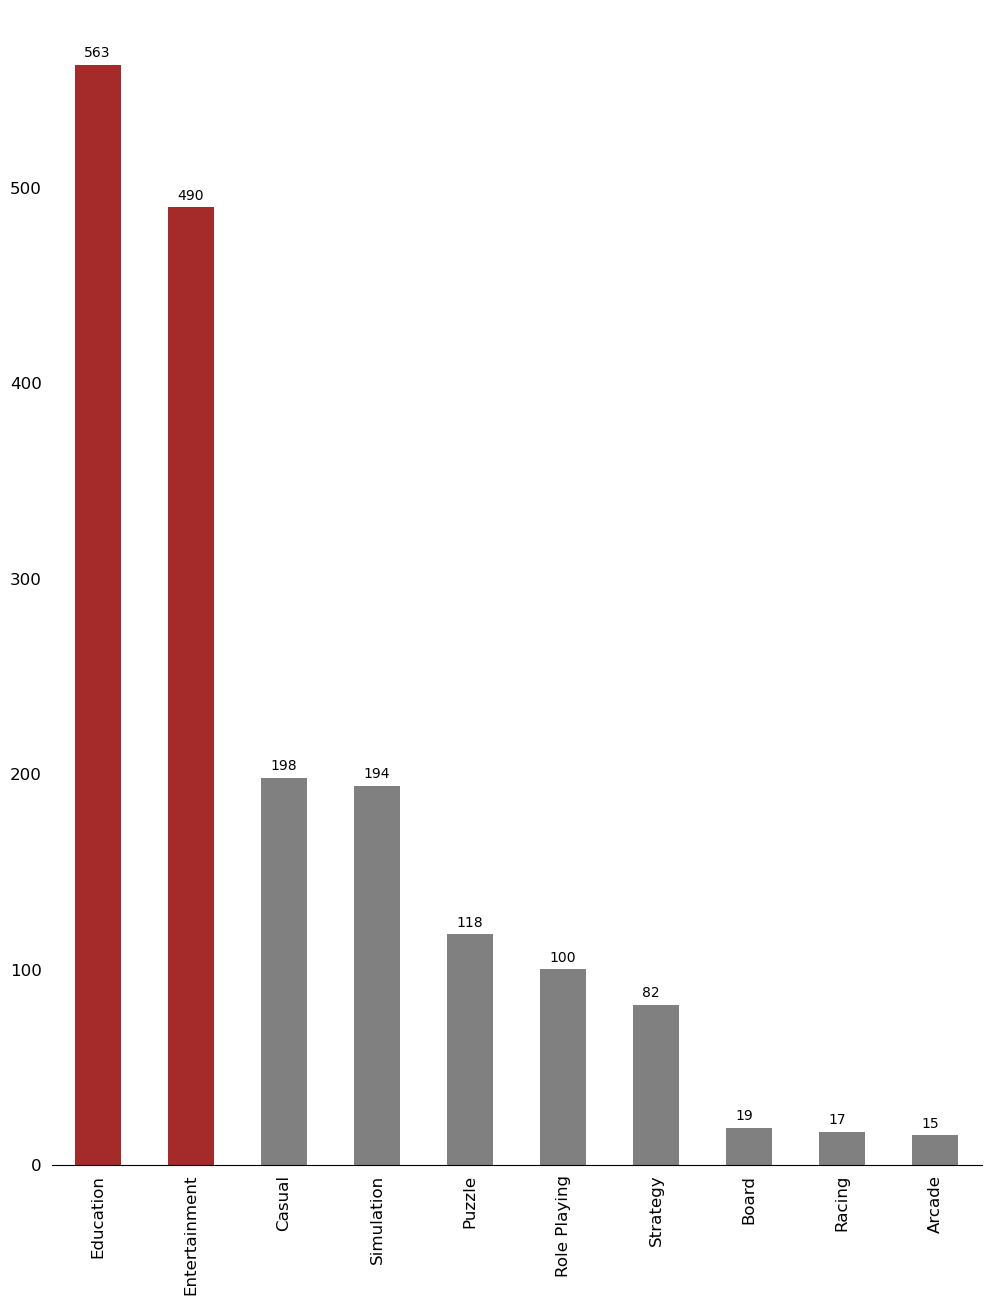

In [518]:
# sets the size of the plot as 12 by 15
fig, ax = plt.subplots(figsize=(12, 15))
# this will get the genres of the family category
Family_genre = data['Genres'][data['Category'] == 'FAMILY']
plott = Family_genre.value_counts()[:10].plot.bar(  # plots the barplot
    color=['brown', 'brown', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'])

for i in plott.patches:  # this will loop through the patches
    # this will annotate the barplot and add the count on the plot
    plott.annotate(i.get_height(), (i.get_x()+0.1, i.get_height()+4))
# this will remove the spines on the plot
remove_spines_on_plot(ax, ['left', 'top', 'right'])
# this will remove the ticks on the plot
ax.tick_params(bottom=False, left=False, labelsize='large')


"Around the world in 2018, a larger fraction of developers are developing apps in the Family Category to majorly educate or <br>
entertain them." - The data just revealed this! 

Do they sell most of their apps or place them for free?

Text(0.5, 1.0, 'A Barplot Showing the Proportion of the Type of Apps Made in the FAMILY Category.\n\n')

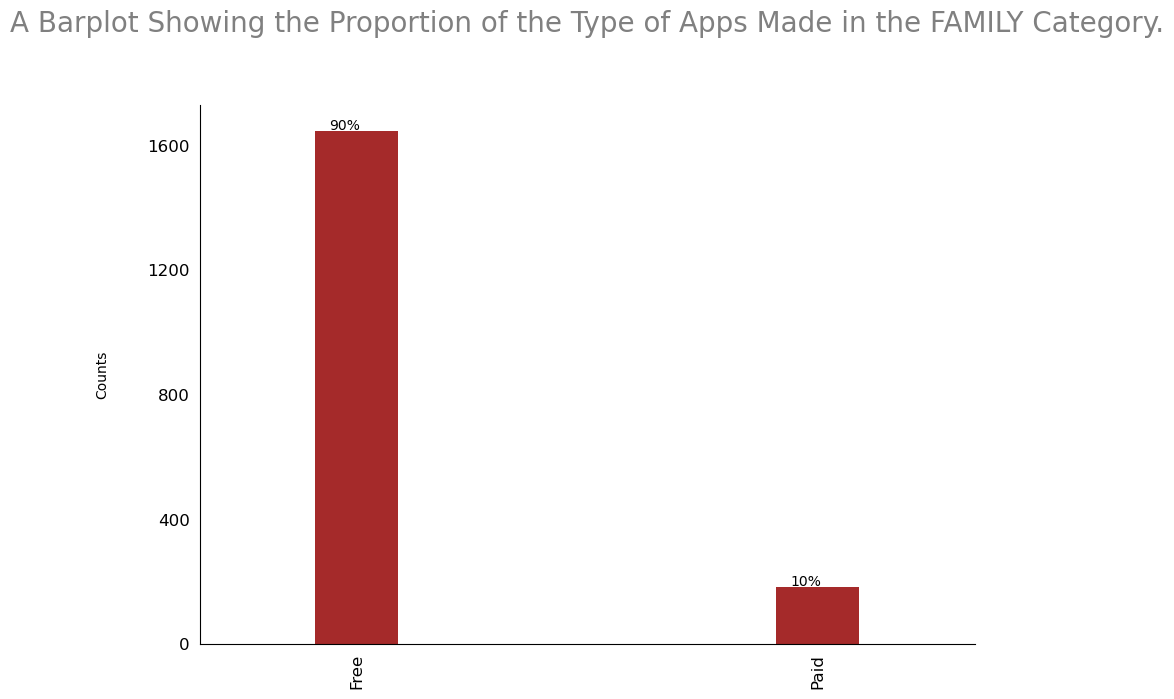

In [519]:
fig, ax = plt.subplots(figsize=(10, 7))  # sets the size of the plot as 10 by 7
# this will get the type of the family category
Family_Type = data['Type'][data['Category'] == 'FAMILY']
plottt = Family_Type.value_counts().plot.bar(color='brown', width=.18)
for i in plottt.patches:
    # this will annotate the plot and add the percentage on the plot
    plottt.annotate('{}%'.format(
        round(i.get_height()/len(Family_Type)*100)), (i.get_x()+0.03, i.get_height()+3))
remove_spines_on_plot(ax, ['top', 'right'])  # this will remove the spines on the plot
plt.ylabel('Counts\n\n')
plt.yticks([0, 400, 800, 1200, 1600])
ax.tick_params(bottom=False, left=False, labelsize='larger')
plt.title('A Barplot Showing the Proportion of the Type of Apps Made in the FAMILY Category.\n\n',
          fontsize=20, color='grey')


A whole lot of the apps made under this 'popular' category are free! Infact, most apps from our data are free to download.


Do they get a high rating for their apps, compared to other categories?

In [520]:
Family_Rating = data['Rating'].groupby(
    data['Category']).mean().sort_values(ascending=False)  # get the mean rating of each category
Family_Rating


Category
EVENTS                   4.425000
EDUCATION                4.363866
ART  AND  DESIGN         4.356106
BOOKS  AND  REFERENCE    4.334234
PERSONALIZATION          4.325532
BEAUTY                   4.283019
PARENTING                4.273333
SOCIAL                   4.255230
HEALTH  AND  FITNESS     4.251736
GAME                     4.245464
WEATHER                  4.239241
SHOPPING                 4.237624
SPORTS                   4.212923
AUTO  AND  VEHICLES      4.191765
PRODUCTIVITY             4.186631
LIBRARIES  AND  DEMO     4.183333
FAMILY                   4.183173
COMICS                   4.178571
FOOD  AND  DRINK         4.176786
MEDICAL                  4.175443
PHOTOGRAPHY              4.160142
HOUSE  AND  HOME         4.158108
COMMUNICATION            4.136190
ENTERTAINMENT            4.135294
NEWS  AND  MAGAZINES     4.117323
FINANCE                  4.113623
BUSINESS                 4.099048
LIFESTYLE                4.094580
TRAVEL  AND  LOCAL       4.073973
VIDEO

([<matplotlib.axis.YTick at 0x22bde345700>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

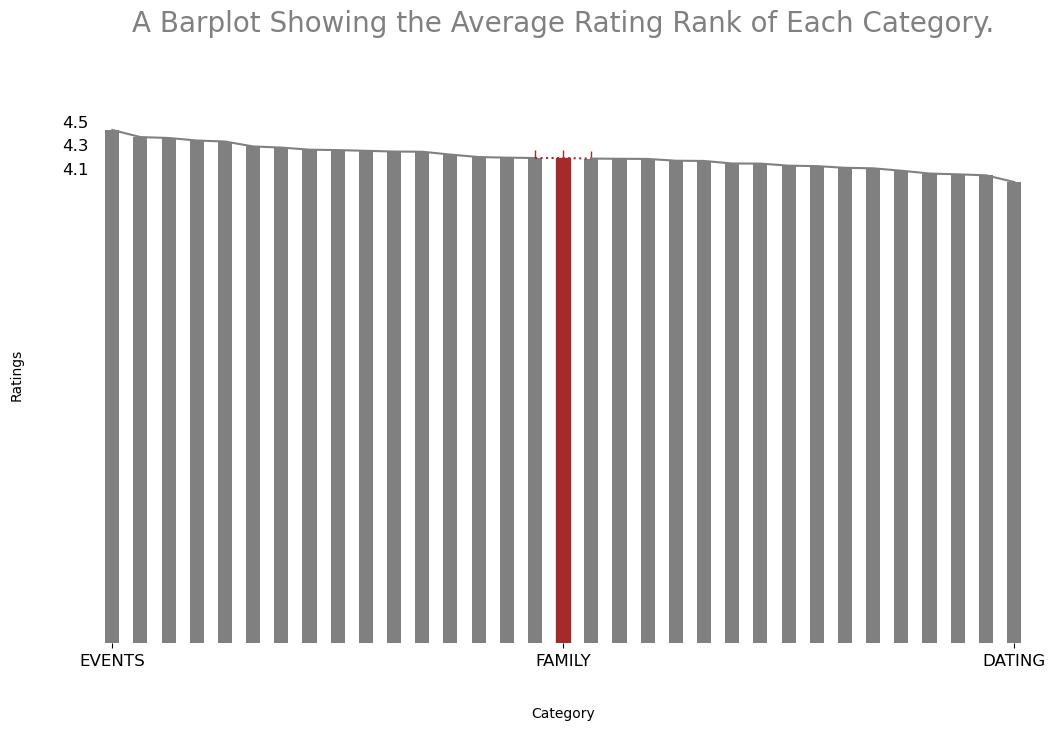

In [521]:
fig, ax = plt.subplots(figsize=(12, 7))  # sets the size of the plot as 12 by 7
# this plots the lineplot and sets the color to grey for the first 16 values
ax.plot(Family_Rating[:16], color='grey',)
# this plots the lineplot and sets the color to brown for the last 3 values
ax.plot(Family_Rating[15:18], color='brown', alpha=1, marker=2, ls=':')
# this plots the lineplot and sets the color to grey for the last 3 values
ax.plot(Family_Rating[17:], color='grey')
# this plots the barplot and sets the color to grey
plot = Family_Rating.plot.bar(color='grey')
for i in plot.patches:
    if i.get_height() == Family_Rating[16]:
        i.set_color('brown')

for i in ['top', 'right', 'left', 'bottom']:
    ax.spines[i].set_visible(False)
ax.tick_params(left=False, labelsize='large')
plt.xticks(['EVENTS', 'FAMILY', 'DATING'], rotation=0)
plt.xlabel('\n\nCategory')
plt.ylabel('Ratings\n\n')
plt.title('A Barplot Showing the Average Rating Rank of Each Category.\n\n',
          fontsize=20, color='grey')
plt.yticks([4.1, 4.3, 4.5])


Though the FAMILY Category has the highest number of apps, it has no important Rating rank among other categories. <br>
EVENTS and DATING have the highest and lowest ranks, respectively.


__Still on the FAMILY Category:__ <br>
What is the minimum number of Installs they get? What's the maximum? What's the avarage, with respect to the other categories?

In [522]:
# this will get the minimum number of installs in each category
data['Installs'].groupby(data['Category']).min().sort_values(ascending=False)


Category
ENTERTAINMENT            1,000,000+
WEATHER                      1,000+
BEAUTY                       1,000+
VIDEO  PLAYERS               1,000+
COMICS                       1,000+
SHOPPING                     1,000+
EDUCATION                    1,000+
PHOTOGRAPHY                  1,000+
PARENTING                    1,000+
MAPS  AND  NAVIGATION        1,000+
LIBRARIES  AND  DEMO         1,000+
HEALTH  AND  FITNESS             1+
TOOLS                            1+
SPORTS                           1+
AUTO  AND  VEHICLES              1+
HOUSE  AND  HOME                 1+
GAME                             1+
FOOD  AND  DRINK                 1+
BOOKS  AND  REFERENCE            1+
COMMUNICATION                    1+
DATING                           1+
EVENTS                           1+
PERSONALIZATION                  0+
NEWS  AND  MAGAZINES             0+
PRODUCTIVITY                     0+
MEDICAL                          0+
SOCIAL                           0+
FINANCE            

The FAMILY Category ranks the lowest in both Series. Its maximum Installs value is so low!


Which apps in the Google Play Store are famous? Apps with the highest installs would reveal this. 


Under which category do most of them fall?


In [523]:
# get the apps with the maximum number of installs
famous_apps = data[data.Installs == data.Installs.max()]
famous_apps


App              Category  \
342                                     Viber Messenger         COMMUNICATION   
347                       imo free video calls and chat         COMMUNICATION   
371               Google Duo - High Quality Video Calls         COMMUNICATION   
378         UC Browser - Fast Download Private & Secure         COMMUNICATION   
403                         LINE: Free Calls & Messages         COMMUNICATION   
1655                                   Candy Crush Saga                  GAME   
1661                                       Temple Run 2                  GAME   
1662                                                Pou                  GAME   
1722                                     My Talking Tom                  GAME   
2546                                      Facebook Lite                SOCIAL   
2550                                           Snapchat                SOCIAL   
3235                                   Google Translate                 TOOLS   
3255                         SHAREit - Transfer & Share                 TOOLS   
3265                       Gboard - the Google Keyboard                 TOOLS   
3450                                     Microsoft Word          PRODUCTIVITY   
3473                                            Dropbox          PRODUCTIVITY   
3476                                    Google Calendar          PRODUCTIVITY   
3574                                        Cloud Print          PRODUCTIVITY   
3703                                          MX Player        VIDEO  PLAYERS   
3739                                            Twitter  NEWS  AND  MAGAZINES   
3755                       Flipboard: News For Our Time  NEWS  AND  MAGAZINES   
4005            Clean Master- Space Cleaner & Antivirus                 TOOLS   
5596                                     Samsung Health  HEALTH  AND  FITNESS   
7536  Security Master - Antivirus, VPN, AppLock, Boo...                 TOOLS   

      Rating   Reviews                Size      Installs  Type  Price  \
342      4.3  11334799  Varies with device  500,000,000+  Free    0.0   
347      4.3   4785892                 11M  500,000,000+  Free    0.0   
371      4.6   2083237  Varies with device  500,000,000+  Free    0.0   
378      4.5  17712922                 40M  500,000,000+  Free    0.0   
403      4.2  10790289  Varies with device  500,000,000+  Free    0.0   
1655     4.4  22426677                 74M  500,000,000+  Free    0.0   
1661     4.3   8118609                 62M  500,000,000+  Free    0.0   
1662     4.3  10485308                 24M  500,000,000+  Free    0.0   
1722     4.5  14891223  Varies with device  500,000,000+  Free    0.0   
2546     4.3   8606259  Varies with device  500,000,000+  Free    0.0   
2550     4.0  17014787  Varies with device  500,000,000+  Free    0.0   
3235     4.4   5745093  Varies with device  500,000,000+  Free    0.0   
3255     4.6   7790693                 17M  500,000,000+  Free    0.0   
3265     4.2   1859115  Varies with device  500,000,000+  Free    0.0   
3450     4.5   2084126  Varies with device  500,000,000+  Free    0.0   
3473     4.4   1861310                 61M  500,000,000+  Free    0.0   
3476     4.2    858208  Varies with device  500,000,000+  Free    0.0   
3574     4.1    282460  Varies with device  500,000,000+  Free    0.0   
3703     4.5   6474426  Varies with device  500,000,000+  Free    0.0   
3739     4.3  11667403  Varies with device  500,000,000+  Free    0.0   
3755     4.4   1284017  Varies with device  500,000,000+  Free    0.0   
4005     4.7  42916526  Varies with device  500,000,000+  Free    0.0   
5596     4.3    480208                 70M  500,000,000+  Free    0.0   
7536     4.7  24900999  Varies with device  500,000,000+  Free    0.0   

     Content Rating                   Genres Last Updated  \
342        Everyone            Communication   2018-07-18   
347        Everyone            Communication   2018-06-08   
371        Everyo

__As expected, they are all free to download, and most of them do not limit any age group from downloading them.__

Text(0.0, 1.0, 'A Barplot Showing the Number of Apps With Over 500 Million Installs Per Category.\n\n')

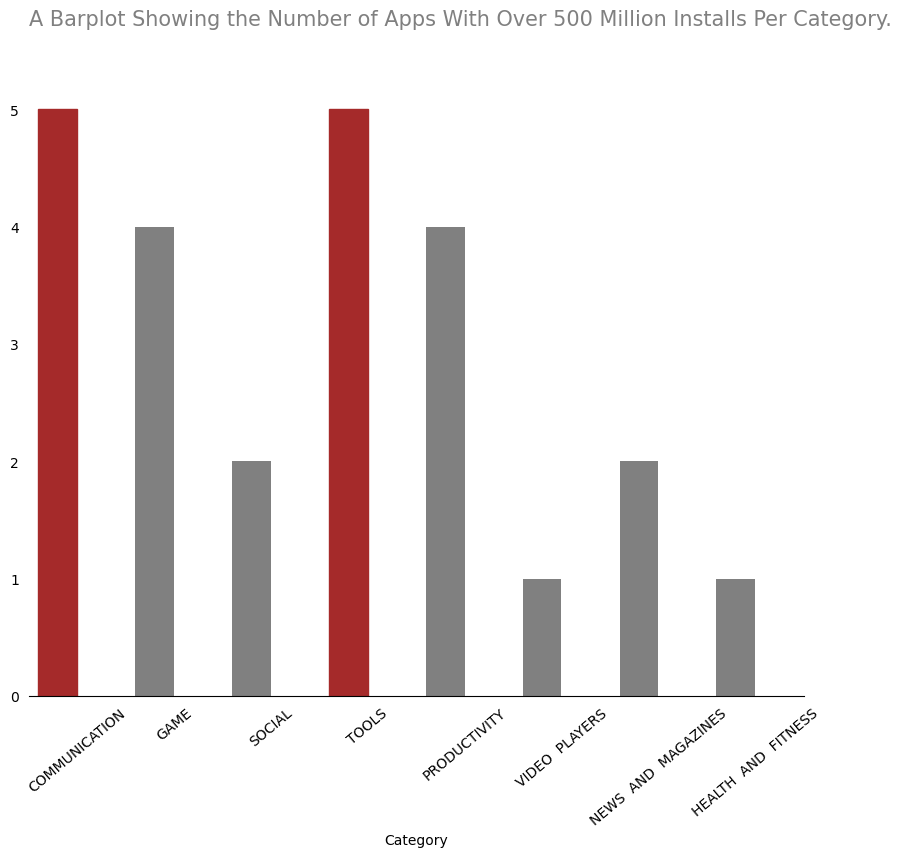

In [524]:
fig, ax = plt.subplots(figsize=(10, 8))  # sets the size of the plot as 10 by 8
plot = sns.countplot(famous_apps['Category'],
                     color='grey')  # plots the countplot
for i in plot.patches:  # this will loop through the patches
    i.set_width(0.4)  # this will set the width of the patches
    # this will highlight the maximum value
    if i.get_height() == famous_apps['Category'].value_counts().max():
        # this will set the color of the maximum value to brown
        i.set_color('brown')
# this will remove the spines on the plot
remove_spines_on_plot(ax, ['left', 'top', 'right'])
# this will remove the ticks on the plot
ax.tick_params(bottom=False, left=False)
plt.xticks(rotation=40)  # this will rotate the xticks by 40 degrees
plt.ylabel('')  # this will remove the ylabel
plt.title('A Barplot Showing the Number of Apps With Over 500 Million Installs Per Category.\n\n',
          fontsize=15, color='grey', loc='left')  # this will set the title of the plot


A whole lot of people have downloaded more apps in the COMMUNICATION and TOOLS Categories, than any other Category. <br>
W'd look deeper into the apps under these 'famous' Categories. 

In [525]:

famous_apps[(famous_apps['Category'] == 'COMMUNICATION') |
            (famous_apps['Category'] == 'TOOLS')]['App'].values
# this will get the apps with the maximum number of installs in the communication category


array(['Viber Messenger', 'imo free video calls and chat',
       'Google Duo - High Quality Video Calls',
       'UC Browser - Fast Download Private & Secure',
       'LINE: Free Calls & Messages', 'Google Translate',
       'SHAREit - Transfer & Share', 'Gboard - the Google Keyboard',
       'Clean Master- Space Cleaner & Antivirus',
       'Security Master - Antivirus, VPN, AppLock, Booster'], dtype=object)

__These are popular apps indeed.__

Which app(s) in the Google Play Store are the least famous?

In [526]:
# get the apps with the minimum number of installs
infamous_apps = data[data.Installs == data.Installs.min()]
infamous_apps


App Category  Rating  Reviews                Size  \
9148  Command & Conquer: Rivals   FAMILY     4.2        0  Varies with device   

     Installs Type  Price Content Rating    Genres Last Updated  \
9148        0  NaN    0.0            10+  Strategy   2018-06-28   

             Current Ver         Android Ver  
9148  Varies with device  Varies with device

Though it is free to download, it still has no downloads.


__About how many years does this data span about? When is the latest date?__

In [527]:
# get the minimum and maximum date
data['Last Updated'].min(), data['Last Updated'].max()


(Timestamp('2010-05-21 00:00:00'), Timestamp('2018-08-08 00:00:00'))

__Last Updated spans for about eight years, from the 21st of May 2010, to the 8th of August, 2018.__


__No app was updated beyond this range.__  <br>
The highest number of updates took place in what year?

Text(0.0, 1.0, 'Distribution of Apps Over Last Updated Years.\n\n\n')

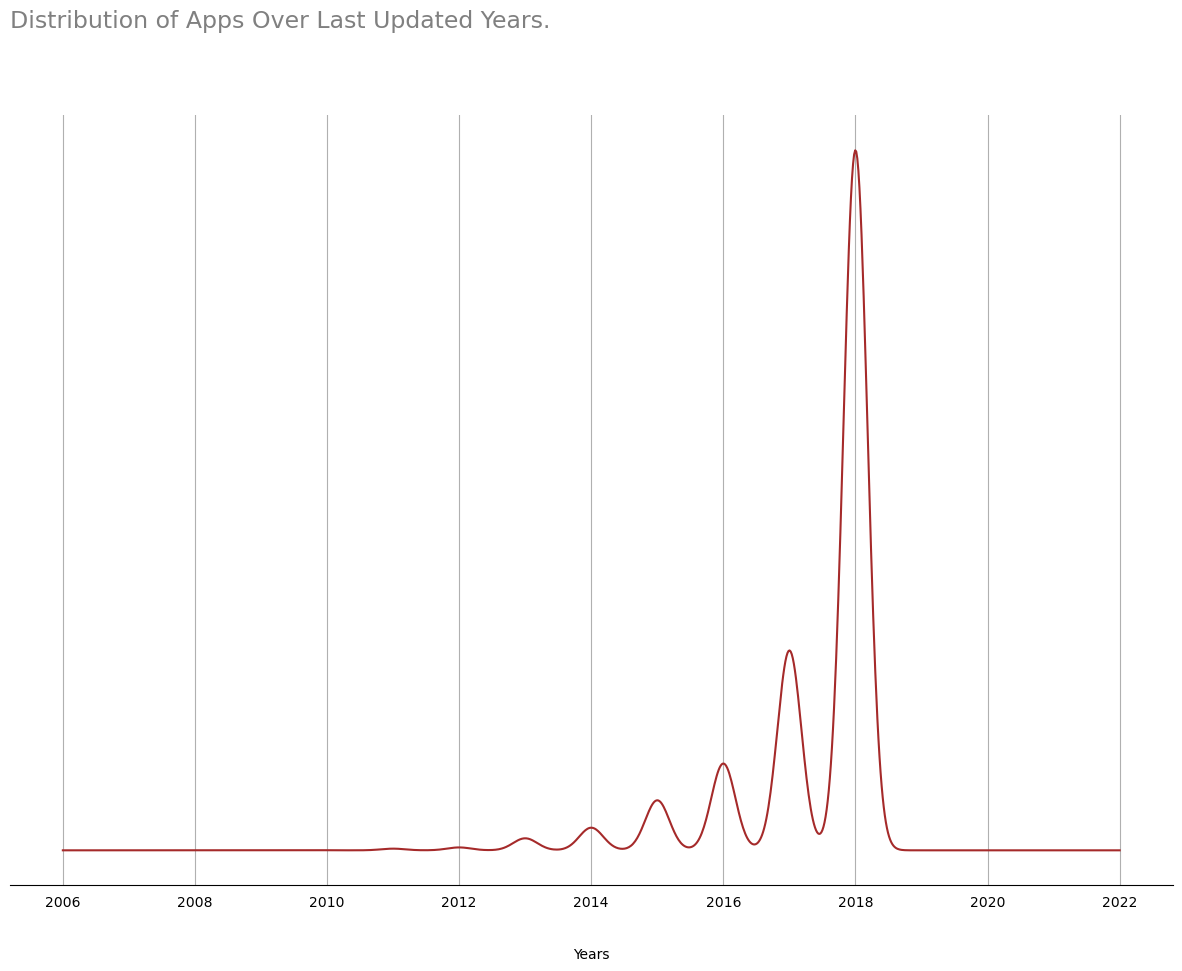

In [528]:
# sets the size of the plot as 15 by 10
fig, ax = plt.subplots(figsize=(15, 10))
# this plots the kdeplot and sets the color to brown
data['Last Updated'].dt.year.plot(kind='kde', color='brown')
remove_spines_on_plot(ax, ['left', 'top', 'right'])  # this will remove the spines on the plot
# this will remove the ticks on the plot
ax.tick_params(bottom=False, left=False, labelleft='')
plt.ylabel('')  # this will remove the ylabel
plt.xlabel('\n\nYears')  # this will set the xlabel
plt.grid(axis='x')  # this will add a grid to the plot
plt.title('Distribution of Apps Over Last Updated Years.\n\n\n',
          loc='left', color='grey', fontsize=17)  # this will set the title of the plot


Which month does updates occur more frequently? Least freqently?
The answer to the latter question would be deduced from years having complete months (Years excluding 2010 and 2018).


If my app has a high number of reviews, will it be highly rated?


Text(0.0, 1.0, 'Total Reviews Made For Each App Vs. App Ratings.\n\n')

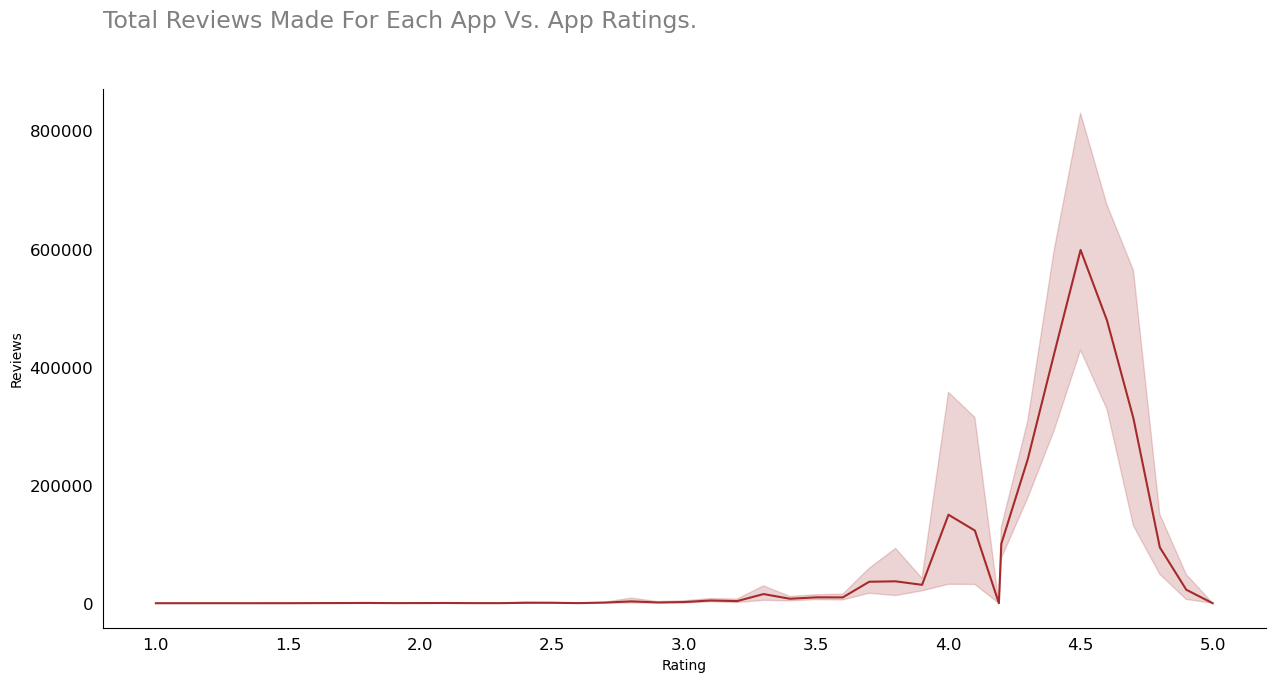

In [529]:
fig, ax = plt.subplots(figsize=(15, 7)) # sets the size of the plot as 15 by 7
plot = sns.lineplot(x=data['Rating'], y=data['Reviews'], color='brown', ax=ax) # plots the lineplot
remove_spines_on_plot(ax, ['top', 'right']) # this will remove the spines on the plot
ax.tick_params(bottom=False, left=False, labelsize='large') # this will remove the ticks on the plot
plt.title('Total Reviews Made For Each App Vs. App Ratings.\n\n',
          loc='left', color='grey', fontsize=17)


In [530]:
# this will get the index of the apps with ratings greater than 5
np.where(data['Rating'] > 5.0)


(array([], dtype=int64),)

Yes, a highly rated app has a lot of people passing down their reviews.
The higher the Rating , the higher the Reviews .
Between free and paid apps, which one of them has a higher chance of being highly rated?


Between free and paid apps, which one of them has a higher chance of being highly rated?


Text(0.0, 1.0, 'A Stripplot Showing How Ratings Vary With App Type\n\n')

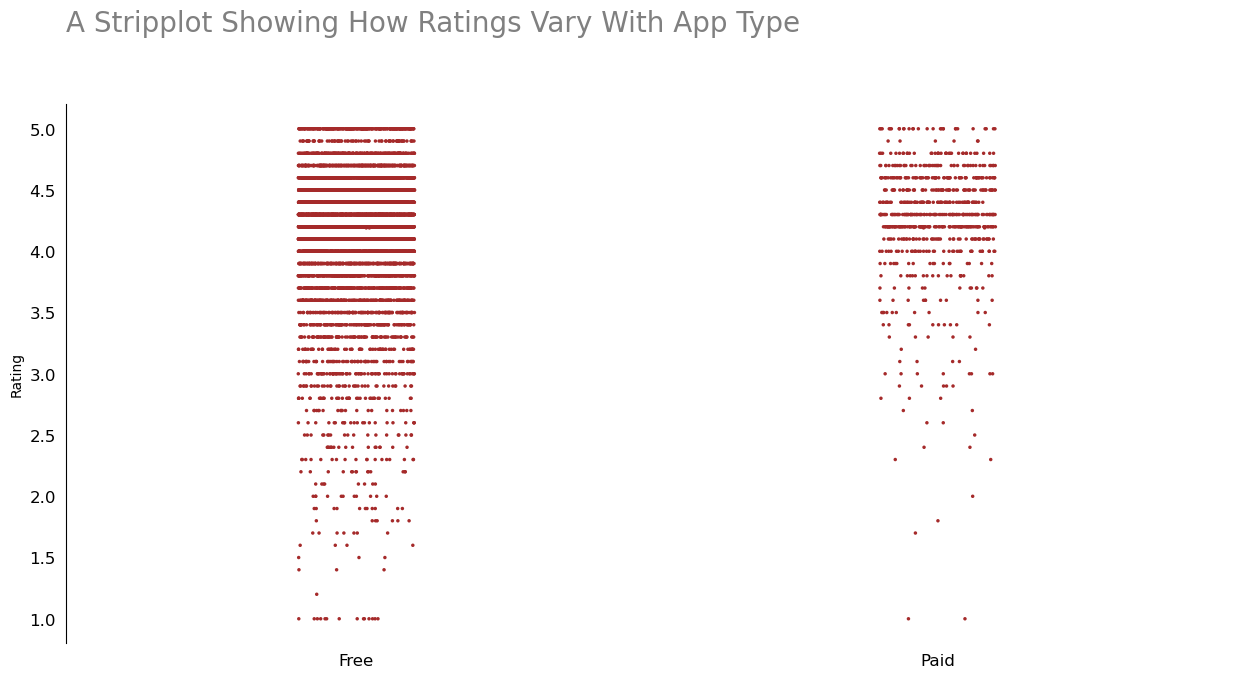

In [531]:
fig, ax = plt.subplots(figsize=(15, 7))  # sets the size of the plot as 15 by 7
sns.stripplot(y='Rating', x='Type', color='brown',
              marker='.', data=data)  # plots the stripplot
remove_spines_on_plot(ax, ['right', 'top', 'bottom'])  
# this will remove the ticks on the plot
ax.tick_params(bottom=False, left=False, labelsize='large')
plt.xlabel('')  # this will remove the xlabel
plt.title('A Stripplot Showing How Ratings Vary With App Type\n\n',
          loc='left', color='grey', fontsize=20) # this will set the title of the plot


Content Rating - What is the proportion of each group?

Text(0.0, 1.0, 'A Barplot Showing the Count of the Various Content Rating Groups.\n\n')

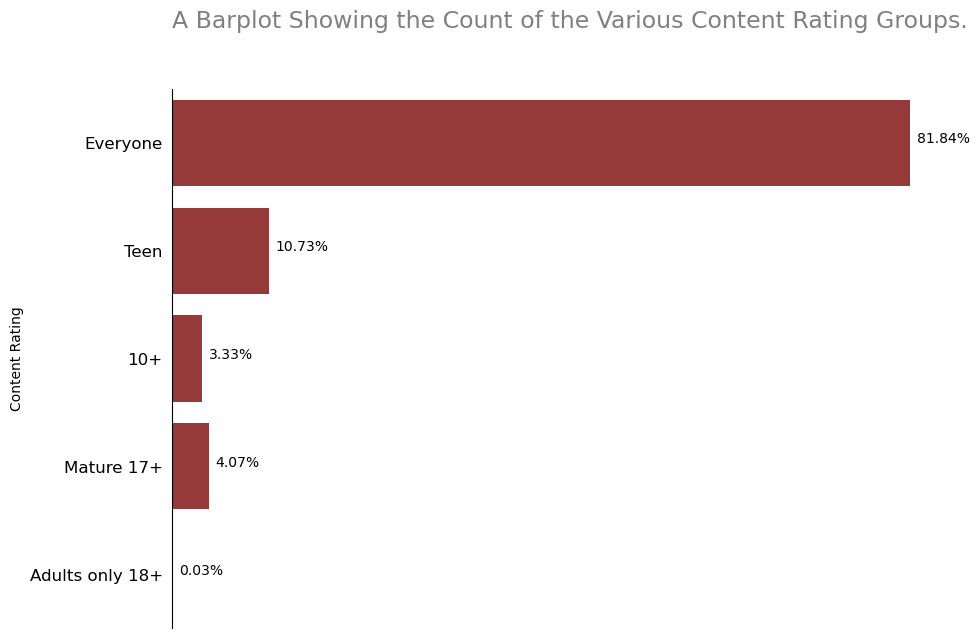

In [532]:
fig, ax = plt.subplots(figsize=(10, 7))  # sets the size of the plot as 10 by 7
plot = sns.countplot(y=data['Content Rating'],
                     color='brown')  # plots the countplot
for i in plot.patches:  # this will loop through the patches
    # this will get the percentage of each category
    text = i.get_width()*100/data.shape[0]
    # this will annotate the plot
    plot.annotate('{:.2f}%'.format(text), (i.get_width()+70, i.get_y()+0.4))
remove_spines_on_plot(ax, ['right', 'top', 'bottom'])
ax.tick_params(bottom=False, left=False, labelsize='large',
               labelbottom='')  # this will remove the ticks on the plot
plt.xlabel('')  # this will remove the xlabel
plt.title('A Barplot Showing the Count of the Various Content Rating Groups.\n\n',
          loc='left', color='grey', fontsize=17)  # this will set the title of the plot


Most apps have no age group restriction. Anyone can download them.
However, a few apps are solely for adults. A closer peep, please.

In [533]:
# this will get the apps with the adult content rating
data[data['Content Rating'] == 'Adults only 18+']


App Category  Rating  Reviews  \
298   Manga Master - Best manga & comic reader   COMICS     4.6    24005   
3043         DraftKings - Daily Fantasy Sports   SPORTS     4.5    50017   
6424                               Manga Books   COMICS     3.8     7326   

                    Size    Installs  Type  Price   Content Rating  Genres  \
298                 4.9M    500,000+  Free    0.0  Adults only 18+  Comics   
3043                 41M  1,000,000+  Free    0.0  Adults only 18+  Sports   
6424  Varies with device    500,000+  Free    0.0  Adults only 18+  Comics   

     Last Updated         Current Ver         Android Ver  
298    2018-07-04             1.1.7.0          4.1 and up  
3043   2018-07-24            3.21.324          4.4 and up  
6424   2018-08-03  Varies with device  Varies with device

These apps have an average high rating, are free to download, and are of two Genres - Comics and Sports.


For apps with the following:
1. maximum rating
2. minimum rating <br>
Most of them fall under which Category ? <br>
Most of them are of which Type ?

In [534]:
# this will get the apps with the minimum rating
minimum = data[data.Rating == data.Rating.min()]
# this will get the apps with the maximum rating
maximum = data[data.Rating == data.Rating.max()]


In [535]:
# this will get the number of apps with the maximum rating per category
maximum.Category.value_counts()


FAMILY                   67
LIFESTYLE                29
MEDICAL                  25
BUSINESS                 18
TOOLS                    17
GAME                     12
HEALTH  AND  FITNESS     12
PERSONALIZATION          10
SOCIAL                    8
PRODUCTIVITY              8
FINANCE                   8
NEWS  AND  MAGAZINES      7
BOOKS  AND  REFERENCE     6
DATING                    6
SHOPPING                  6
EVENTS                    6
PHOTOGRAPHY               6
COMMUNICATION             5
SPORTS                    4
TRAVEL  AND  LOCAL        3
COMICS                    2
FOOD  AND  DRINK          2
LIBRARIES  AND  DEMO      2
PARENTING                 1
ART  AND  DESIGN          1
Name: Category, dtype: int64

In [536]:
# this will get the number of apps with the minimum rating per category
minimum.Category.value_counts()


FAMILY           3
MEDICAL          3
TOOLS            3
FINANCE          2
DATING           1
GAME             1
PRODUCTIVITY     1
COMMUNICATION    1
BUSINESS         1
Name: Category, dtype: int64

<b>The highest rated apps, as well as the least rated apps are found mainly in the FAMILY Category and are definitely free to
download.</b>


Considering Size


In [537]:
data.Size.value_counts().head()  # this will get the top 5 sizes of apps


Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
Name: Size, dtype: int64

Most of the sizes recorded are not definite. Hence, we cannot really work with this column as we ought to.
I'd create a temporal custom dataframe with rows having "Varies with device" as Size filtered out

In [538]:
# this will get the apps with a fixed size
dataframe = data[data.Size != 'Varies with device']
dataframe.Size.value_counts().head()  # this will get the top 5 sizes of apps


11M    182
12M    181
13M    177
14M    177
15M    163
Name: Size, dtype: int64

<pre>This can now be work with.
The target is to make Size column an integer type. 
This column should have megabyte as its unit.
First, 'M' (symbolizing megabyte) will be removed.
Second, those ending with 'k' (symbolizing kilobyte) will have their integer part divided by 1024 (1024Kb makes 1Mb)
Third, 'k' will be removed.
Lastly, the column would be converted to a float type and renamed.
Doing all these will make the column have only megabyte as its unit, so that correct analysis can be done.
</pre>

In [539]:
# the lamda function converts the size of the app to megabytes
dataframe.Size = dataframe.Size.str.replace('M', '').apply(lambda x: float(x[:-1])/1024 if x[-1] == 'k' else x).astype(
    'float')  # this replaces the M with nothing and converts the size to megabytes
# add a new column to the dataframe called Size in Mb
dataframe['Size In Mb'] = dataframe.Size


In [540]:
# this will get the summary statistics of the size of the apps
dataframe['Size In Mb'].describe()


count    8432.000000
mean       20.394897
std        21.827898
min         0.008301
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size In Mb, dtype: float64

Based on the dataset, the average size an app from Play Store has is about 20 Mb.


Does the Category an app belong to affect how sized the app is? Which category has the least app size? Which one has the highest?

Text(0.0, 1.0, 'How App Sizes Vary In Each Category and Each Type.\n\n')

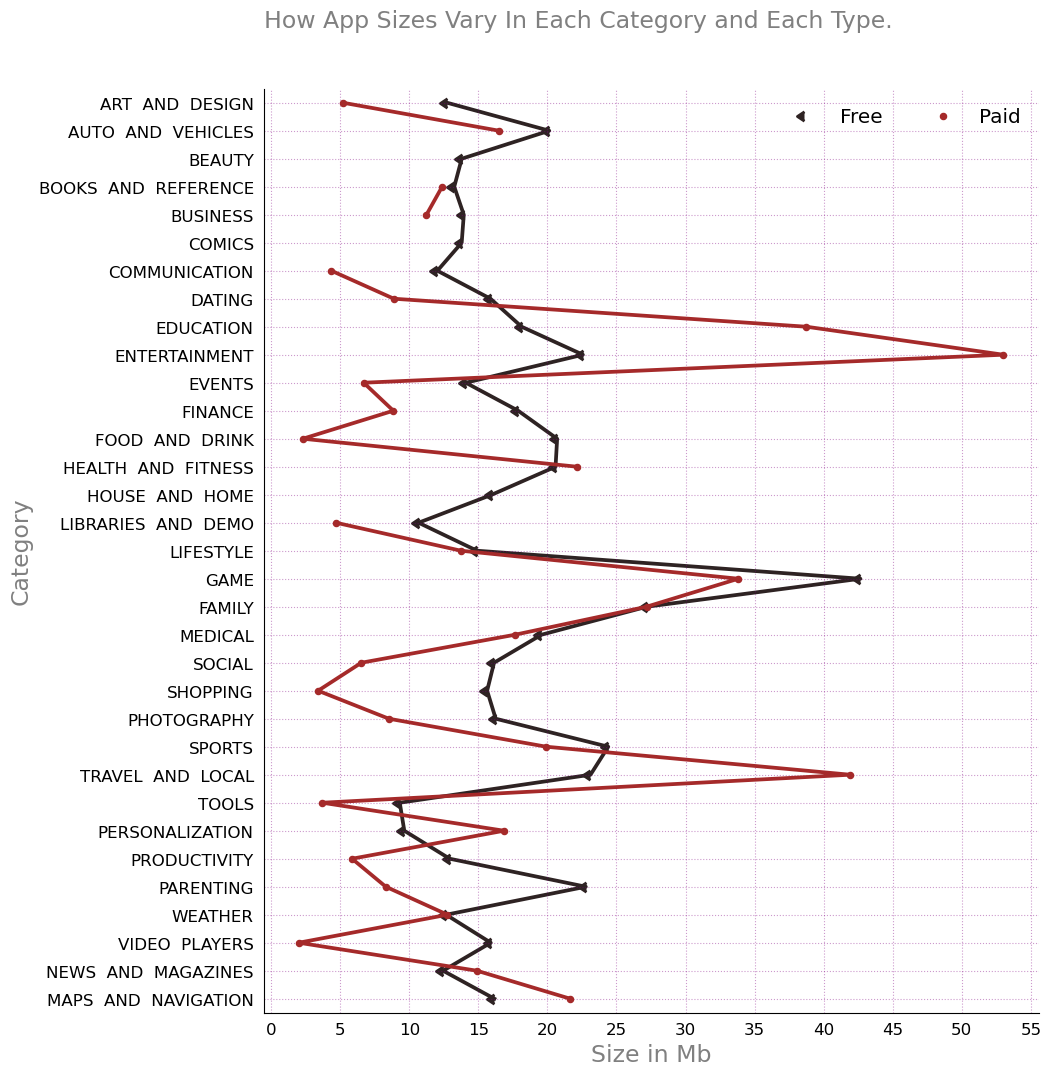

In [541]:
# this sets the size of the plot as 10 by 12
fig, ax = plt.subplots(figsize=(10, 12))
sns.pointplot('Size In Mb', 'Category', data=dataframe, hue='Type', color='brown',
              ci=None, markers=[8, '.'], ax=ax)  # this plots the pointplot
# this adds the legend to the plot
plt.legend(ncol=2, frameon=False, fontsize='x-large')
remove_spines_on_plot(ax, ['right', 'top'])  # this will remove the spines on the plot
# this removes the ticks on the plot
ax.tick_params(bottom=False, left=False, labelsize='large')
plt.xlabel('Size in Mb', color='grey', fontsize=17)  # this sets the xlabel
plt.ylabel('Category', color='grey', fontsize=17)  # this sets the ylabel
plt.xticks(np.arange(0, 56, 5))  # this sets the xticks
plt.grid(color='purple', ls=':', alpha=.4)  # this adds a grid to the plot
plt.title('How App Sizes Vary In Each Category and Each Type.\n\n',
          loc='left', color='grey', fontsize=17)  # this sets the title of the plot


<pre>For Paid apps (brown colored line), two spikes are seen in the ENTERTAINMENT and TRADE AND LOCAL Categories with
average sizes of about 53 Mb and 42 Mb respectively.
Free apps' (most apps fall under this type, denoted by the black colored line), however has a lower spike and this is found in the
GAME Category. It has an average size of about 43 Mb.
Paid apps are usually larger in size. </pre>


<h2 id="5"> Predictive Modelling </h2>


To choose a suitable model to train our data with, checking out for the correlation between these features is essential.


In [542]:
dataframe.corr()  # this will get the correlation between the numerical columns


Rating   Reviews      Size     Price  Size In Mb
Rating      1.000000  0.066669  0.058595 -0.019598    0.058595
Reviews     0.066669  1.000000  0.179321 -0.008649    0.179321
Size        0.058595  0.179321  1.000000 -0.022441    1.000000
Price      -0.019598 -0.008649 -0.022441  1.000000   -0.022441
Size In Mb  0.058595  0.179321  1.000000 -0.022441    1.000000

<pre>
Aim is to predict how many installs an app will have, based on other features.
Spltting the data into dependent (y) and independent (X) features.
To determine which feature could affect Installs , I will examine each of the features.
</pre>

### Review
<pre>
App : The name of the app definitely has no impact on if I'd get 20 or 200000 Installs.
Category : The number of Installs could depend on the category an app is.
Rating : A highly installed app could attract high ratings.
Reviews : Ealier on (in the EDA section), we saw that a highly rated app attracts
more reviews. Thus, an app is meant to have a lot of users (pontential reviewers) 
because it has a high number of reviews
Size : Installs would definitely depend on the app size. 'Varies with device' 
as an entry would have no certain impact on Installs, thus would be dropped 
('dataframe' would be used for the data modelling rather than 'data', for obvious reasons).
Type : A free app could have more users installing them.
Price : The same thing goes for this feature.
Content Rating : This, as well.
Last Updated : The number of installs cannot be predicted from when last an app was updated.
Current Ver : Likewise this.
Android Ver : This could affect Installs. If my android version is not compatible with the 
app's required version, I would decide not to download it. I'd rather go with 
an alternative app.
</pre>


In [543]:
# Importing libraries from scikit learn.
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score


In [544]:
# this will drop the columns that are not needed
X = dataframe.drop(['App', 'Last Updated', 'Current Ver'], axis=1)
y = dataframe['Installs']  # this will set the target variable


In [545]:
Encoder = LabelEncoder()  # this will instantiate the label encoder
for i in X.select_dtypes('O'):  # this will loop through the categorical columns
    # this will encode the categorical columns
    X[i] = Encoder.fit_transform(X[i])


In [546]:
# this will split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0)


In [547]:
# this will instantiate the decision tree classifier for fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # this will fit the model to the training data


DecisionTreeClassifier()

In [548]:
y_pred = model.predict(X_test)  # this will make predictions on the test data


In [549]:
accuracy_score(y_test, y_pred)  # this will get the accuracy score


1.0

Accurate!

### Regression Model
The aim is to predict what the rating of an app will be, based on other features

### Review
<pre>
App : The name of the app definitely has no impact on if I'd get a star or 5 stars.
Category : The rating could depend on the category an app is.
Installs : A highly installed app could attract high ratings.
Reviews : Everone who drops a review drops a rating.
Size : Rating would definitely depend on the app size.
Type : A free app could have more users highly rating it.
Price : The same thing goes for this feature.
Content Rating : This, as well.
Last Updated : Rating cannot be predicted from when last an app was updated.
Current Ver : Likewise this.
Android Ver : This could affect Rating . If my android version is not compatible
with the app's required version, I could get furious and give it just a star.
</pre>

In [556]:
# this will drop the columns that are not needed
X = dataframe.drop(['App', 'Last Updated', 'Current Ver'], axis=1)
y = dataframe['Rating']  # this will set the target variable


In [551]:
Encoder = LabelEncoder()  # this will instantiate the label encoder
for i in X.select_dtypes('O'):  # this will loop through the categorical columns
    # this will encode the categorical columns
    X[i] = Encoder.fit_transform(X[i])


In [552]:
# this will split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)


In [553]:
# this will instantiate the decision tree regressor
model = DecisionTreeRegressor(random_state=2)
model.fit(X_train, y_train)  # this will fit the model to the training data


DecisionTreeRegressor(random_state=2)

In [554]:
y_pred = model.predict(X_test)  # this will make predictions on the test data


In [557]:
r2_score(y_test, y_pred)  # this will evaluate the model


1.0

Great! This is accurate!.

<h2 id="6"> Conclusion </h2>

Based on the exploratory data analysis, I can conclude that:
1. Most of the Google Play Store Apps are of the Family category, while the least is Comics.
2. A whole lot of the apps made under that are popular are free!.
3. "In 2018, a larger fraction of developers are developing apps in the Family Category to majorly educate or 
entertain them." 
4. A highly rated app has a lot of people passing down their reviews.
5. The higher the Rating, the higher the Reviews.
6. Most apps have no age group restriction. Anyone can download them.
7. The highest rated apps, as well as the least rated apps are found mainly in the FAMILY Category and are definitely free to download.
8. Paid apps are usually larger in size.


<h2 id="7"> References </h2>

* Google Play Store Dataset [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps)
* [Google Play Store](https://play.google.com/store/apps)
* Visualizations [Seaborn](https://seaborn.pydata.org/)
* [Pandas](https://pandas.pydata.org/)
* Dr Sean Mc Grath Labs
* [Stack Overflow](https://stackoverflow.com/)
* Cephas ICT HUB Lab Notes - [Cephas ICT HUB](https://www.cephasict.com/)
